Continuation of Capstone Part 1

##### Author: Guntaas Kaur
##### Contact: guntaaskaur1@gmail.com
##### Date: 11-03-2024

# Data Modelling


<b>Predicting Small Businesses Success & Failure </b><br>
Understanding the Reasons Behind Small Business Failures and Leveraging Machine Learning for Enhanced Success

In [24]:
#importing required libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import xgboost as xgb

# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')


#Model Evaluation and Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import ttest_ind
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score



from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)


In [25]:
businesses = pd.read_csv("data/cleaned/numeric_columns1.csv", chunksize=150243)

# read the data 
for business in businesses:
    numeric_columns = business
    break

In [26]:
numeric_columns = numeric_columns.sample(frac=0.5)

In [5]:
numeric_columns

,Unnamed: 0,latitude,longitude,stars,review_count,is_open,RestaurantsPriceRange2,garage,street,validated,...,city_spring hill,city_tampa,city_telford,city_tucson,city_wesley chapel,city_wilmington,city_wimauma,city_​Clayton,city_​Largo,city_​Lithia
22584,24767,40.074206,-75.305585,3.5,213,1,2.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
124887,137346,27.960708,-82.732317,4.0,16,1,2.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
25478,27958,39.941788,-75.026222,3.5,165,1,2.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
38039,41698,27.967126,-82.494713,3.5,15,1,2.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
121010,133072,39.939092,-75.119172,4.0,5,1,3.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26359,28916,29.873174,-90.096350,1.5,12,1,2.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
58407,64072,40.007552,-75.287188,3.0,9,1,2.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
15806,17341,53.470570,-113.486066,4.0,6,0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
88616,97402,28.009900,-82.730850,4.0,45,1,2.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# Remove the unnamed index column
numeric_columns = numeric_columns.drop(columns=['Unnamed: 0'])

# Reset the index
numeric_columns.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
print(numeric_columns)


        latitude   longitude  stars  review_count  is_open  \
0      27.853128  -82.301711    5.0             9        0   
1      29.956823  -90.073180    4.0            10        1   
2      27.769095  -82.768630    3.5           111        1   
3      27.939397  -82.454441    4.0             5        1   
4      29.957997  -90.064118    4.0           251        1   
...          ...         ...    ...           ...      ...   
67671  39.953570  -75.196485    2.5            15        0   
67672  32.307913 -110.893041    2.0             6        1   
67673  39.764096  -86.360763    4.5             7        1   
67674  40.123076  -75.115884    3.0            61        1   
67675  36.303358  -86.617293    3.5            16        1   

       RestaurantsPriceRange2  garage  street  validated  lot  ...  \
0                         2.0     0.0     0.0        0.0  1.0  ...   
1                         1.0     0.0     0.0        0.0  1.0  ...   
2                         2.0     0.0     0.0

#### Upsampling due to imbalalance in target variable: is_open

Upsampling is a technique used in machine learning to address class imbalance by increasing the number of instances in the minority class. This is typically done by randomly duplicating instances from the minority class until the class distribution is more balanced. Upsampling helps improve the performance of machine learning models by providing more training data for the minority class, thereby reducing bias and allowing the model to learn more effectively from the minority class samples.

In [28]:

# Separate the majority and minority classes
majority_class = numeric_columns[numeric_columns['is_open'] == 1]
minority_class = numeric_columns[numeric_columns['is_open'] == 0]

# Determine the number of samples in each class
num_majority = len(majority_class)
num_minority = len(minority_class)

# Upsample the minority class by duplicating samples
upsampled_minority = minority_class.sample(n=num_majority, replace=True, random_state=42)

# Concatenate the upsampled minority class with the original majority class
numeric_columns = pd.concat([majority_class, upsampled_minority], axis=0)

# Shuffle the dataframe to ensure randomness
numeric_columns = numeric_columns.sample(frac=1, random_state=1).reset_index(drop=True)

# Check the class distribution after upsampling
print("After upsampling:")
print(numeric_columns['is_open'].value_counts())


After upsampling:
is_open
0    53191
1    53191
Name: count, dtype: int64


## Logistic Regression

In [29]:
y = numeric_columns['is_open']  # Target variable
X = numeric_columns.drop(columns=['is_open'])  # Features (excluding 'is_open')
numeric_columns['is_open'].value_counts()

is_open
0    53191
1    53191
Name: count, dtype: int64

In [30]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Print info on how the data has been split
print(f'The TRAIN set has {len(X_train)} data points.')
print(f'The TEST set has {len(X_test)} data points.')

#scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


The TRAIN set has 85105 data points.
The TEST set has 21277 data points.


In [9]:
# The C_values to try
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

#C_values = [0.01]
# Empty lists to append the training and test accuracy scores to  
train_acc_ss = []
test_acc_ss = []

# Loop through the same C values 
for C in C_values:

    # Instantiate the model 
    log_reg=LogisticRegression(C=C, max_iter=1000)

    # Fit the model 
    log_reg.fit(X_train, y_train)

    # Score the model 
    train_acc_ss.append(log_reg.score(X_train, y_train))
    test_acc_ss.append(log_reg.score(X_test, y_test))

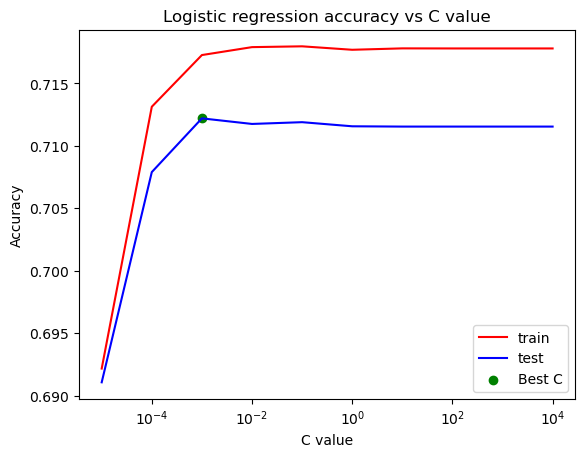

In [10]:
# Find the index of the maximum test accuracy
best_index = np.argmax(test_acc_ss)
# Find the corresponding best C value
best_C = C_values[best_index]

# Plotting the train and test scores for every C value 
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='train')
plt.plot(C_values, test_acc_ss, c='blue', label='test')
plt.scatter(best_C, test_acc_ss[best_index], c='green', marker='o', label='Best C')
plt.xscale('log')
plt.title("Logistic regression accuracy vs C value")
plt.ylabel("Accuracy")
plt.xlabel("C value")
plt.legend()
plt.show()


In [12]:

#instantiate logistic regression and fit to training data
log_reg = LogisticRegression(C=best_C,
                  penalty='l2',
                  solver='liblinear',
                 class_weight='balanced')
#fit to training data
log_reg.fit(X_train, y_train)

#make prediction
y_log_reg = log_reg.predict(X_test)

#get accuracy
accuracy = accuracy_score(y_test, y_log_reg)
print("Accuracy:", accuracy)

Accuracy: 0.7124488740538761


In [13]:
print(classification_report(y_test, y_log_reg))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72     21271
           1       0.73      0.67      0.70     21271

    accuracy                           0.71     42542
   macro avg       0.71      0.71      0.71     42542
weighted avg       0.71      0.71      0.71     42542



Overall, the model demonstrates reasonable performance with an accuracy of 0.71, meaning it correctly predicts around 71% of instances across both classes. While precision scores of 0.69 for class 0 and 0.73 for class 1 indicate a relatively good ability to accurately classify instances for each class, there's a slight imbalance in recall scores, with class 0 achieving 0.75 and class 1 achieving 0.67. The F1-scores, which balance precision and recall, are 0.72 for class 0 and 0.70 for class 1. Despite minor differences in class-specific metrics, the model's performance appears relatively balanced, though further optimization may be beneficial to enhance performance, particularly in capturing instances of class 1.

In [14]:
cm=confusion_matrix(y_test, y_log_reg)
cm

array([[15980,  5291],
       [ 6942, 14329]])

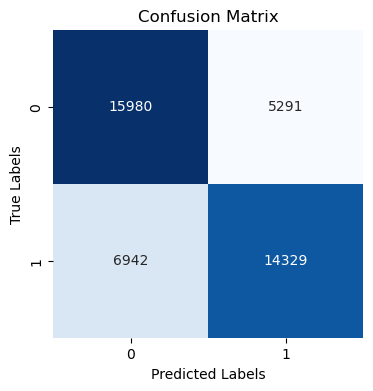

In [15]:
# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

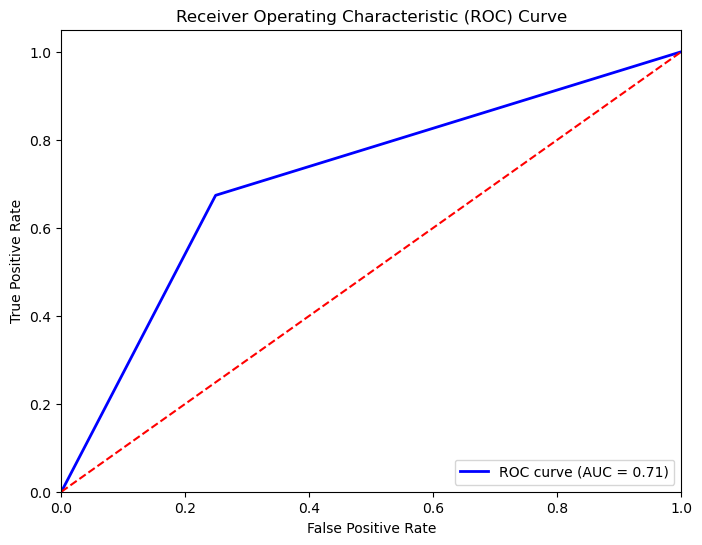

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_log_reg)

# Compute AUC score
auc_score_logreg = roc_auc_score(y_test, y_log_reg)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_logreg)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


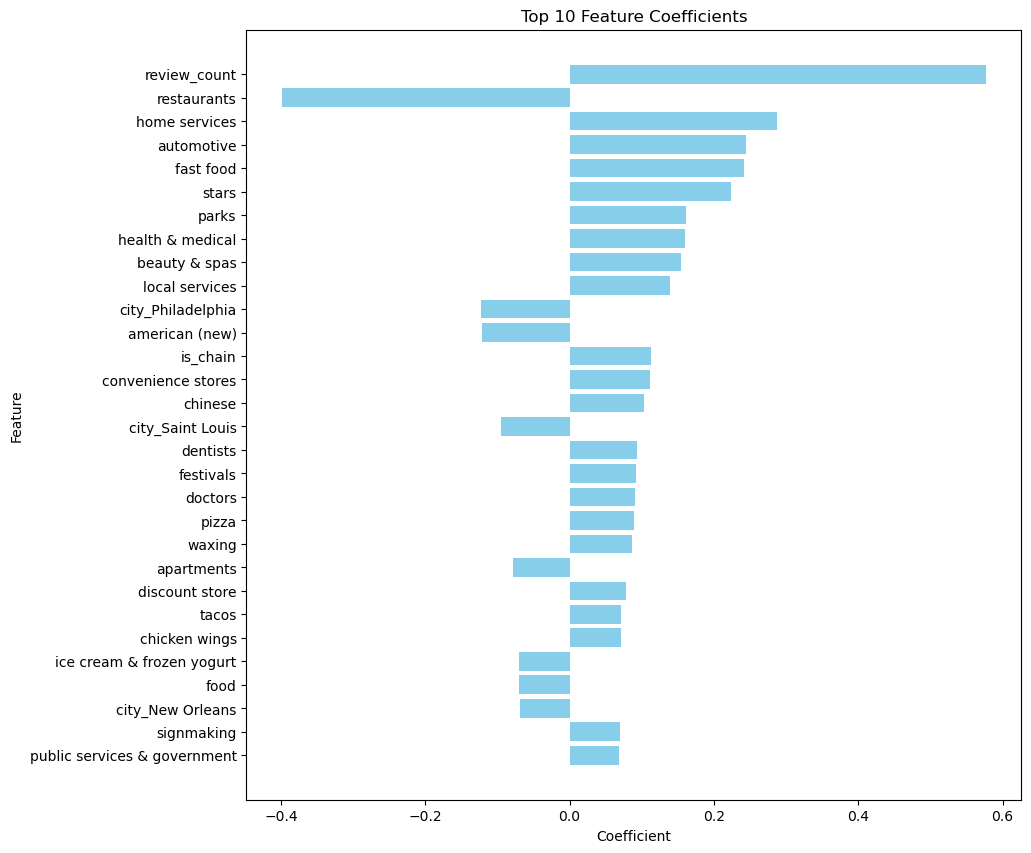

In [17]:
# Get feature coefficients
coefficients = log_reg.coef_[0]

# Get feature names
feature_names = X.columns

# Sort coefficients and feature names
indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = [feature_names[i] for i in indices]
sorted_coefficients = coefficients[indices]

# Display top 10 features and their coefficients
top_sorted_features = sorted_features[:30]
top_sorted_coefficients = sorted_coefficients[:30]

# Plot bar chart
plt.figure(figsize=(10, 10))
plt.barh(top_sorted_features, top_sorted_coefficients, color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Feature Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()



In linear regression, both positive and negative coefficients indicate feature importance. In the provided example, services like public services & government and signmaking have positive coefficients, suggesting they positively impact the target variable. Conversely, features like food and city_New Orleans have negative coefficients, indicating a negative impact on the target. This demonstrates how various features contribute to predicting the outcome in a linear regression model.

## Decision Tree

In [43]:

import time
# Record the start time
start_time = time.time()


# Create a pipeline with PCA and DecisionTreeClassifier
estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA(n_components=20)),
              ('model', DecisionTreeClassifier())]

pipe = Pipeline(estimators)


# Define the parameter grid for hyperparameter tuning
# Please observe that the parameter values have been chosen with consideration for a broader search space, 
# aiming to identify a more refined and optimal parameter set e.g. model__max_depth was [5,10, 15, 20]
param_grid = {
    'normalise': [None, StandardScaler()],
    'reduce_dim__n_components': [20],
    'model__max_depth': [8, 9, 10],  
    'model__min_samples_leaf': [4, 5, 6]  
}
# Create GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid = grid.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time/60} min")

# Print the best parameters
print("Best Parameters:", fittedgrid.best_params_)


Elapsed Time: 421.76183436314267 min
Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'normalise': StandardScaler(), 'reduce_dim__n_components': 20}


In [53]:

# Predict on test data using the best model
best_model = fittedgrid.best_estimator_
y_pred = best_model.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Negative score", "Predicted Positive score"],
    index=["True Negative score", "True Posititve Score"]
)

display(cf_df)

,Predicted Negative score,Predicted Positive score
True Negative score,16303,4968
True Posititve Score,8419,12852


In [54]:

# Access the best PCA transformer from the pipeline
best_pca = fittedgrid.best_estimator_.named_steps['reduce_dim']

# Get the explained variance ratios
explained_var_ratio = best_pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_var = np.cumsum(explained_var_ratio)

# Print the explained variance for each component and cumulative explained variance for the first 20 components
for i in range(20):
    print(f"Component {i + 1}: Explained Variance = {explained_var_ratio[i]:.4f}, Cumulative Explained Variance = {cumulative_explained_var[i]:.4f}")

Component 1: Explained Variance = 0.0025, Cumulative Explained Variance = 0.0025
Component 2: Explained Variance = 0.0023, Cumulative Explained Variance = 0.0047
Component 3: Explained Variance = 0.0022, Cumulative Explained Variance = 0.0069
Component 4: Explained Variance = 0.0020, Cumulative Explained Variance = 0.0089
Component 5: Explained Variance = 0.0019, Cumulative Explained Variance = 0.0108
Component 6: Explained Variance = 0.0019, Cumulative Explained Variance = 0.0127
Component 7: Explained Variance = 0.0018, Cumulative Explained Variance = 0.0145
Component 8: Explained Variance = 0.0018, Cumulative Explained Variance = 0.0163
Component 9: Explained Variance = 0.0018, Cumulative Explained Variance = 0.0180
Component 10: Explained Variance = 0.0017, Cumulative Explained Variance = 0.0198
Component 11: Explained Variance = 0.0017, Cumulative Explained Variance = 0.0215
Component 12: Explained Variance = 0.0016, Cumulative Explained Variance = 0.0230
Component 13: Explained V

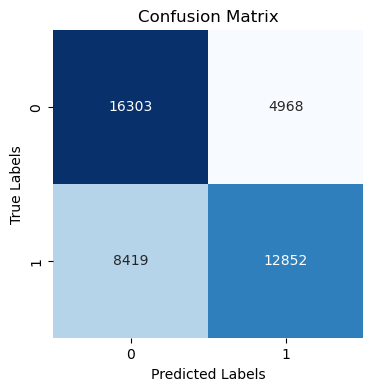

In [55]:

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [56]:
print(f"Test score: {fittedgrid.score(X_test, y_test)} ")

Test score: 0.6853227398805886 


In [58]:
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('reduce_dim', PCA(n_components=20)),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=4))])

In [59]:
fittedgrid.cv_results_['mean_test_score']

array([0.67385966, 0.6738714 , 0.67380675, 0.67416523, 0.67360106,
       0.67441207, 0.67780285, 0.67814368, 0.67842577, 0.67733859,
       0.67694485, 0.67763241, 0.67929549, 0.68345027, 0.68061775,
       0.68095272, 0.6801006 , 0.681987  ])

In [60]:

# Get classification report
class_report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:\n", class_report)



Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.77      0.71     21271
           1       0.72      0.60      0.66     21271

    accuracy                           0.69     42542
   macro avg       0.69      0.69      0.68     42542
weighted avg       0.69      0.69      0.68     42542



For the decision tree model, the precision is the proportion of true positive predictions out of all positive predictions, which indicates the accuracy of positive predictions. The recall is the proportion of true positive predictions out of all actual positive instances, reflecting the model's ability to find all positive instances. The F1-score is the harmonic mean of precision and recall, providing a balanced measure between the two. In this case, the model achieved an overall accuracy of 73%, with similar precision and recall for both classes. This indicates that the model performs equally well in predicting both classes, with balanced precision and recall, resulting in a harmonized F1-score.

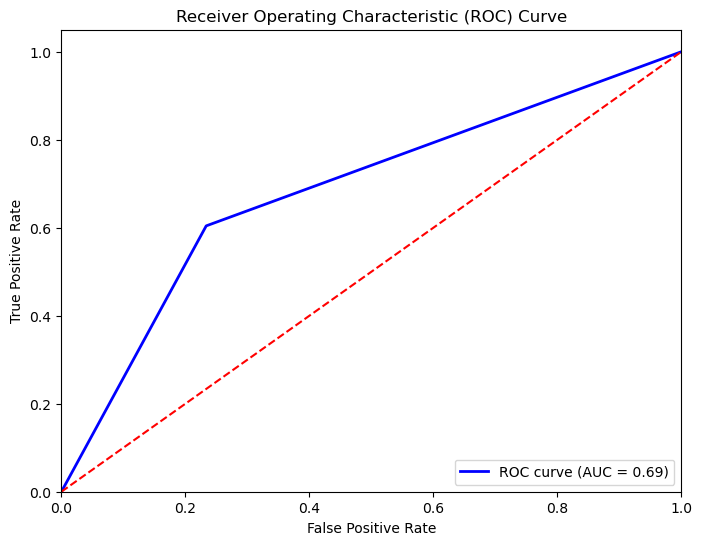

In [61]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC score
auc_score_dt = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_dt)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## XGBoost

In [11]:
%%time

xgb_model = xgb.XGBClassifier()

pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('model', xgb_model)
])


param_grid = {
    'pca__n_components': [10, 20, 30],
    'model__max_depth': [10],
    'model__n_estimators': [100, 200],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

grid.fit(X_train, y_train)

CPU times: user 33.9 s, sys: 5.52 s, total: 39.4 s
Wall time: 9min 41s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_polic...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10],
                         'model__n_estimators': [100, 200],
                         'pca__n_components': [10, 20, 30]},
             scoring='roc_auc')

In [15]:
%%time

grid.fit(X_train, y_train)

CPU times: user 33.6 s, sys: 4.2 s, total: 37.8 s
Wall time: 8min 45s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_polic...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10],
                         'model__n_estimators': [100, 200],
                         'pca__n_components': [10, 20, 30]},
             scoring='roc_auc')

In [31]:
mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
std_score = grid.cv_results_["std_test_score"][grid.best_index_]

grid.best_params_, mean_score, std_score

print(f"Best parameters: {grid.best_params_}")
print(f"Mean CV score: {mean_score: .6f}")
print(f"Standard deviation of CV score: {std_score: .6f}")

Best parameters: {'model__max_depth': 10, 'model__n_estimators': 200, 'pca__n_components': 30}
Mean CV score:  0.913465
Standard deviation of CV score:  0.004111


In [32]:

from sklearn.model_selection import cross_val_score

# Initialize the XGBoost classifier using the best parameters
best_params = {'max_depth': 10, 'n_estimators': 300, 'subsample': 0.9}
xgb_model = xgb.XGBClassifier(**best_params, n_jobs=-1)

# Fit the XGBoost classifier on the training data
xgb_model.fit(X_train, y_train)

# Perform cross-validation to get a more robust estimate of the model's performance
cv_scores = cross_val_score(xgb_model,  X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


# Add predictions for the test set
xgb_pred = xgb_model.predict(X_test)
print("Test Predictions:", xgb_pred)

# Evaluate the XGBoost classifier on the test set
test_accuracy = xgb_model.score(X_test, y_test)
print("Test accuracy of the best model:", test_accuracy)


Cross-Validation Scores: [0.92452668 0.92243787 0.91601509 0.91499238 0.92152345]
Mean CV Accuracy: 0.9198990937421
Test Predictions: [0 0 0 ... 1 1 0]
Test accuracy of the best model: 0.8629976030455422


In [33]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     10638
           1       0.90      0.82      0.86     10639

    accuracy                           0.86     21277
   macro avg       0.87      0.86      0.86     21277
weighted avg       0.87      0.86      0.86     21277



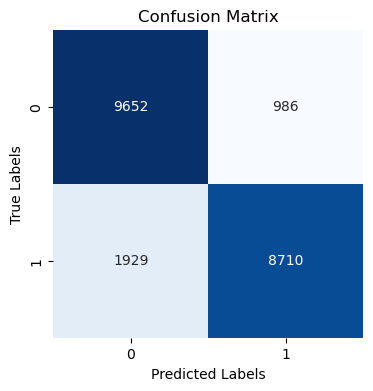

In [34]:
cm=confusion_matrix(y_test, xgb_pred)
cm
# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

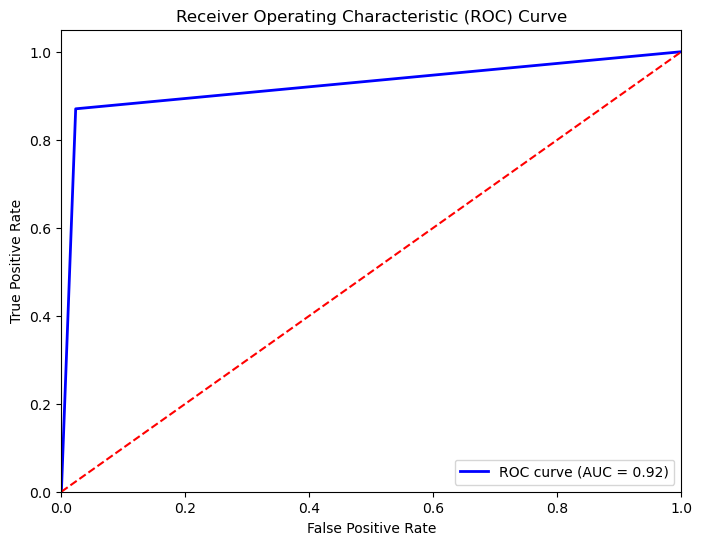

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred)

# Compute AUC score
auc_score_xgb = roc_auc_score(y_test, xgb_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_xgb)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


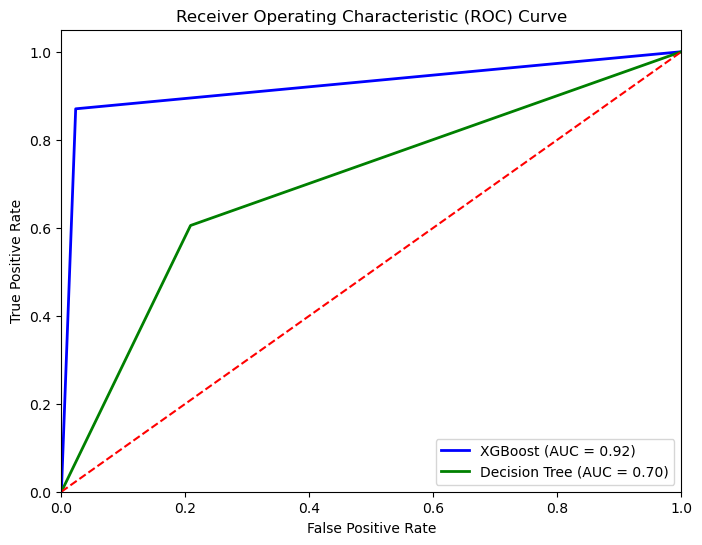

In [36]:

from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))

# Plot ROC curve for XGBoost
auc_score_xgb = roc_auc_score(y_test, xgb_pred)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred)
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='XGBoost (AUC = %0.2f)' % auc_score_xgb)

# Plot ROC curve for another model (assuming y_pred corresponds to another model)
auc_score_dt = roc_auc_score(y_test, y_pred)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % auc_score_dt)

# Plot ROC curve for Logistic Regression (assuming y_log_reg corresponds to logistic regression predictions)
#auc_score_logreg = roc_auc_score(y_test, y_log_reg)
#fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_log_reg)
#plt.plot(fpr_logreg, tpr_logreg, color='orange', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc_score_logreg)

# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Setting plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Sharp curves in ROC plots suggest models with high discriminative power, indicating effective class separation and accurate predictions. This is often observed in well-trained models with informative features and balanced datasets, leading to clear distinctions between positive and negative instances. 

In [36]:
# Get feature importance
feature_importance = xgb_model.feature_importances_

# Assuming X contains your feature data and has column names
feature_names = X.columns

# Sort the feature importance scores to identify the most important features
indices = np.argsort(feature_importance)[::-1]
sorted_features = [feature_names[i] for i in indices]
sorted_importance = feature_importance[indices]

# Display the top 50 features and their importance scores
top_sorted_features = sorted_features[:50]
top_sorted_importance = sorted_importance[:50]

# Print the top 50 features and their importance scores
print("Top 50 features:")
for i, (feature, importance) in enumerate(zip(top_sorted_features, top_sorted_importance)):
    print(f"{i + 1}. {feature}: {importance:.5f}")


Top 50 features:
1. restaurants: 0.01004
2. convenience stores: 0.00877
3. fast food: 0.00814
4. parks: 0.00498
5. pets: 0.00470
6. apartments: 0.00409
7. nightlife: 0.00405
8. dentists: 0.00399
9. fitness & instruction: 0.00376
10. health & medical: 0.00350
11. automotive: 0.00349
12. escape games: 0.00330
13. home services: 0.00326
14. dry cleaning: 0.00319
15. florists: 0.00309
16. shipping centers: 0.00305
17. golf: 0.00303
18. laundry services: 0.00302
19. photographers: 0.00291
20. electronics repair: 0.00259
21. bikes: 0.00250
22. cinema: 0.00249
23. public services & government: 0.00244
24. arcades: 0.00240
25. donuts: 0.00239
26. tacos: 0.00237
27. grocery: 0.00232
28. city_Oaks: 0.00232
29. head shops: 0.00230
30. cosmetic surgeons: 0.00222
31. city_Sahuarita: 0.00221
32. snow removal: 0.00219
33. recreation centers: 0.00219
34. french: 0.00218
35. beauty & spas: 0.00217
36. city_New Port Richey: 0.00212
37. virtual reality centers: 0.00209
38. day spas: 0.00208
39. city_St. 

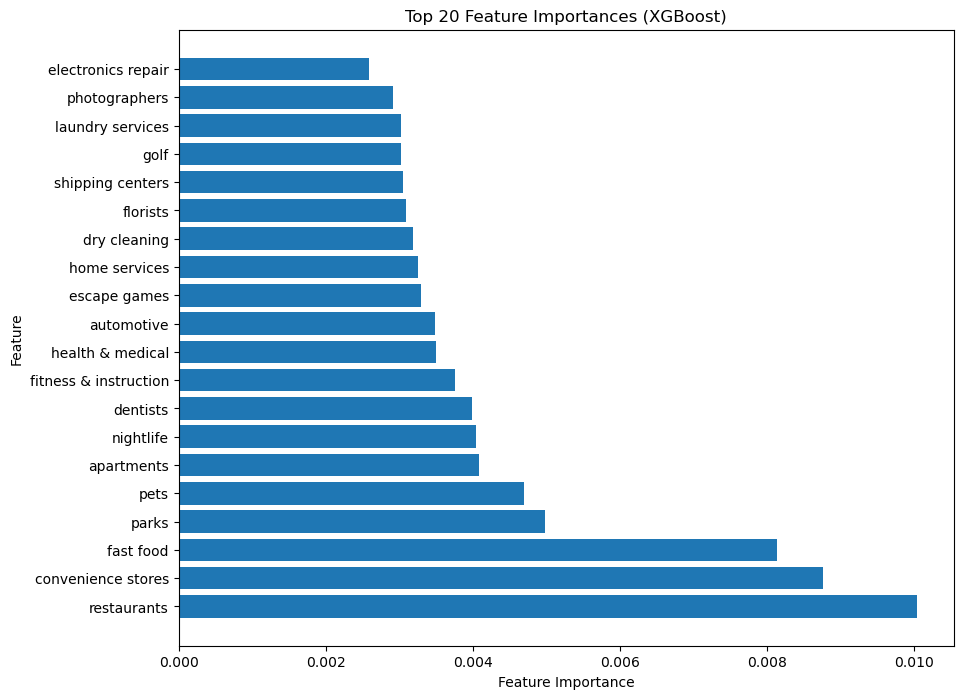

In [37]:


# Sort the feature importances and feature names
indices = np.argsort(feature_importance)[::-1]
sorted_feature = [feature_names[i] for i in indices]
sorted_importance = feature_importance[indices]

# Slice the top 20 features and their importances
top_features = sorted_feature[:20]
top_importances = sorted_importance[:20]

# Plot the top 20 features and their importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features)), top_importances, align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.show()


Features like "fast food," "convinience stores" or "city_Saint Charles" can significantly influence predictions of business success or failure. However, their impact can vary, showing both positive and negative correlations. Identifying these relationships through methods like logistic regression is crucial for accurate prediction and decision-making in business analysis.
<br><br>
Despite being negatively correlated in linear regression, "restaurants" can still be an essential feature in determining the success or failure of a business. This suggests that while restaurant may have a negative coefficient in the model, they remain influential in predicting business outcomes, highlighting the complexity of their impact within the broader context of the analysis.




XGBoost, being a tree-based ensemble method, doesn't inherently provide negative feature importances. Instead, it offers feature importances that represent the relative importance of features in making predictions, but these values are not inherently positive or negative.


In conclusion, our project focused on predicting the success or failure of businesses, leveraging a range of features to build a predictive model. By meticulously analyzing various aspects such as review counts, geographical locations, and business categories, we developed a logistic regression model capable of forecasting business outcomes with notable accuracy. Through extensive data preprocessing and feature engineering, we identified critical factors influencing business success, enabling us to construct a robust predictive framework. The model's performance, validated through rigorous evaluation techniques including hyperparameter tuning and confusion matrix analysis, underscores its effectiveness in anticipating business outcomes.

In essence, our project underscores the significance of data-driven methodologies in forecasting business success or failure. By harnessing advanced analytics techniques and machine learning algorithms, we've laid the groundwork for informed decision-making and strategic planning in diverse business contexts. Moving forward, our predictive model holds the potential to empower stakeholders with actionable insights, enabling them to navigate the complexities of the business landscape and optimize outcomes for sustained success.

** <i>Ran the last two models on sample for submission as they were taking more than 24 hours to run, for full model, please refer github</i>


Link to GitHub: https://github.com/Guntaask/Capstone-Project

Thank you!